# Okavango GCM Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import glob
import itertools
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
import seaborn as sns
# from matplotlib.dates import date2num
import matplotlib.dates as mdates
# from hydroeval import evaluator, nse, rmse, pbias

In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/swatmf_git/swatmf_pkgs')

In [3]:
import gcm_analysis

# Set Path

In [4]:
working_path = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\weather_inputs_081221"
base = "D:\\Projects\\Watersheds\\Okavango\\scenarios\\okvg_swatmf_scn_climates\\models\\base\\pcp1.pcp"

# Rainfall Data

In [5]:
wt_fds, full_paths = gcm_analysis.get_weather_folder_lists(working_path)


# Read Combined PCP

In [6]:
wt_fds, full_paths = gcm_analysis.get_weather_folder_lists(working_path)
tot_df = pd.DataFrame()
for n, p in zip(wt_fds, full_paths):
    os.chdir(p)
    df = gcm_analysis.read_pcp(os.path.join(p, 'pcp1.pcp'), 257)

    for i in df.columns:
        dff = df[i].loc[df[i] >=200]
        dff.name = 'rainfall'
        dff = dff.to_frame()
        dff['sub_no'] = i
        dff['model_name'] = n
        tot_df = pd.concat([tot_df, dff], axis=0)
tot_df['date'] = tot_df.index
# tot_df.reset_index(drop=False)
# tot_df = tot_df.set_index('model_name')
# tot_df['model_name'] =  tot_df
tot_df = tot_df.sort_values(by=['model_name', 'date'])


100%|██████████| 257/257 [00:06<00:00, 38.13it/s]


In [11]:
tot_df

rainfall   sub_no          model_name       date
2029-01-28     204.4  sub_104  ssp245-ukesm1-0-ll 2029-01-28
2078-02-28     204.4  sub_104  ssp245-ukesm1-0-ll 2078-02-28
2078-02-28     214.3  sub_114  ssp245-ukesm1-0-ll 2078-02-28
2078-02-28     221.7  sub_122  ssp245-ukesm1-0-ll 2078-02-28
2078-02-28     216.2  sub_126  ssp245-ukesm1-0-ll 2078-02-28
2078-02-28     213.9  sub_129  ssp245-ukesm1-0-ll 2078-02-28
2078-02-28     216.9  sub_130  ssp245-ukesm1-0-ll 2078-02-28
2074-02-16     214.3  sub_114       ssp585-miroc6 2074-02-16
2074-02-16     201.9  sub_126       ssp585-miroc6 2074-02-16
2074-02-16     203.8  sub_129       ssp585-miroc6 2074-02-16
2044-01-18     204.4  sub_104  ssp585-ukesm1-0-ll 2044-01-18
2044-01-18     214.3  sub_114  ssp585-ukesm1-0-ll 2044-01-18
2044-01-18     221.7  sub_122  ssp585-ukesm1-0-ll 2044-01-18
2044-01-18     216.2  sub_126  ssp585-ukesm1-0-ll 2044-01-18
2044-01-18     213.9  sub_129  ssp585-ukesm1-0-ll 2044-01-18
2044-01-18     216.9  sub_130  ssp585-ukesm1-0-ll 2044-01-18

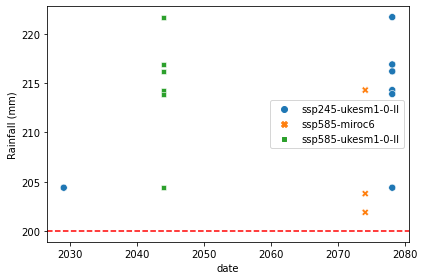

In [12]:
f, ax = plt.subplots()
# ax.scatter(tot_df.index, tot_df.rainfall)
sns.scatterplot(
    x='date', y='rainfall', hue='model_name',
    data=tot_df,
    style="model_name",
    s=50)
ax.axhline(y=200, color='r', linestyle='--')
ax.set_ylabel('Rainfall (mm)')
# ax.text(0.02, 0.1, '200', color='r', transform=ax.transAxes)
ax.legend()
f.tight_layout()
plt.savefig(os.path.join(working_path, 'over_200.jpg'), dpi=300, bbox_inches="tight")
plt.show()

In [13]:
base_df = gcm_analysis.read_pcp(base, 257)

100%|██████████| 257/257 [00:03<00:00, 73.28it/s]


In [14]:
base_df

sub_1  sub_2  sub_3  sub_4  sub_5  sub_6  sub_7  sub_8  sub_9  \
1960-01-01    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1960-01-04   20.4   26.5   21.6   17.4   18.1    1.9   23.1    0.0    3.1   
1960-01-05   20.6   21.3   21.7   21.6   25.0   38.9   25.4   31.2   33.6   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-27   18.2   17.0   16.6   16.0   14.1    9.3   16.0    7.1    9.2   
2019-12-28    0.0   11.0    2.6    0.0    1.6    6.2    5.8    5.5    5.8   
2019-12-29   17.2   14.2   16.8   22.2   17.8   17.2   12.1   17.6   14.0   
2019-12-30    0.0    0.0    0.0    0.0    0.0    0.5    0.0    1.1    2.7   
2019-12-31    6.9    2.4    5.6    6.1    5.8    9.0    4.3   11.3    8.5   

            sub_10  ...  sub_248  sub_249  sub_250  sub_251  sub_252  sub_253  \
1960-01-01     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1960-01-02     0.0  ...      0.0      0.0      0.0      0.0      1.8      2.3   
1960-01-03     0.0  ...      1.1      0.0      1.5      3.0      0.0      0.0   
1960-01-04     0.0  ...      0.0      0.0      0.0      0.0      0.0      0.0   
1960-01-05    33.4  ...      0.0      0.0      0.0      0.0      0.0      0.0   
...            ...  ...      ...      ...      ...      ...      ...      ...   
2019-12-27     9.8  ...      4.8      4.4      1.3      1.0      1.6      2.7   
2019-12-28     6.1  ...      0.1      0.0      0.6      0.0      1.1      2.3   
2019-12-29    10.6  ...      0.0      4.4      2.9      6.4      7.3      7.6   
2019-12-30     3.0  ...      8.7      4.7      8.7      5.4      5.9     10.2   
2019-12-31    10.9  ...      4.8      3.7      7.1      4.1      8.7      8.2   

            sub_254  sub_255  sub_256  sub_257  
1960-01-01      5.1      1.6      1.9      2.3  
1960-01-02      0.0      2.6      1.2      0.0  
1960-01-03      0.0      3.9      3.3      4.7  
1960-01-04      0.0      4.1      4.3      5.5  
1960-01-05      0.0      4.1      4.3      5.5  
...             ...      ...      ...      ...  
2019-12-27      0.8      0.0      0.0      0.0  
2019-12-28      2.4      9.4     10.0      8.0  
2019-12-29     12.8      6.9      4.5      5.2  
2019-12-30     10.1      6.7      6.5      4.7  
2019-12-31      5.1      4.6      2.6      2.7  

[21915 rows x 257 columns]

In [15]:
base_df.max().max()

147.8

In [16]:

base_dfm = base_df.mean(axis=1) # whole watershed
# base_dfm = base_df['sub_240']
base_dfm.name ='base'
base_dfm

1960-01-01    0.232296
1960-01-02    0.030739
1960-01-03    0.080545
1960-01-04    4.082879
1960-01-05    9.100389
                ...   
2019-12-27    7.906615
2019-12-28    7.579767
2019-12-29    5.707004
2019-12-30    5.128794
2019-12-31    5.223346
Name: base, Length: 21915, dtype: float64

In [17]:
base_dfm = base_dfm['1/1/1980':'12/31/2019']
as_base =  base_dfm.resample('A').sum()
ms_base = base_dfm.resample('M').sum()

In [18]:
as_base.name ='base'
ms_base.name ='base'

In [19]:
as_base

1980-12-31     597.686770
1981-12-31     599.377432
1982-12-31     866.950584
1983-12-31     720.656420
1984-12-31     781.801167
1985-12-31     738.493385
1986-12-31     850.978599
1987-12-31     661.088327
1988-12-31     838.621790
1989-12-31     708.924514
1990-12-31     866.301167
1991-12-31     774.965370
1992-12-31     611.685992
1993-12-31     812.564591
1994-12-31     641.059922
1995-12-31     610.918677
1996-12-31     664.949805
1997-12-31     844.140467
1998-12-31     701.964202
1999-12-31     843.335798
2000-12-31     723.815175
2001-12-31     795.857588
2002-12-31     735.700778
2003-12-31     761.665759
2004-12-31     805.396109
2005-12-31     706.712451
2006-12-31     961.555642
2007-12-31     644.785214
2008-12-31     922.663813
2009-12-31     907.129961
2010-12-31     879.582879
2011-12-31    1098.644358
2012-12-31     793.932685
2013-12-31     697.875875
2014-12-31     770.628016
2015-12-31     565.023346
2016-12-31     774.165759
2017-12-31     765.634241
2018-12-31  

In [20]:
dff = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    df = gcm_analysis.read_pcp(os.path.join(i, 'pcp1.pcp'), 257)
    df = df.mean(axis=1) # whole watershed
    # df = df['sub_240']
    df.name = name
    dff = pd.concat([dff, df], axis=1)



100%|██████████| 257/257 [00:06<00:00, 36.94it/s]


In [21]:
dff

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01         10.187938          0.732296       3.475875   
1980-01-02         10.819455          1.292607       0.776654   
1980-01-03          4.091829          1.683658       3.120623   
1980-01-04          3.149027          3.301946       3.884047   
1980-01-05          1.861089          6.675875       5.516732   
...                      ...               ...            ...   
2099-12-27          2.188327          6.773541       1.202724   
2099-12-28          1.463035          4.818677       5.715564   
2099-12-29          1.293774          9.247471       9.577432   
2099-12-30          0.892607         12.368482       9.153696   
2099-12-31          1.073930          9.163424       7.384047   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          13.198054            1.514397         10.187938   
1980-01-02          10.115175            2.723346         10.819455   
1980-01-03          11.752529            2.219066          4.091829   
1980-01-04           5.987938            2.240467          3.149027   
1980-01-05           2.827626            6.182101          1.861089   
...                       ...                 ...               ...   
2099-12-27           7.402335            0.767315          0.243580   
2099-12-28           8.760311            0.767315          0.297276   
2099-12-29          11.570039            6.791440          2.791051   
2099-12-30           9.473152            3.142023         10.392607   
2099-12-31           3.149027            1.731518          3.119455   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01          0.732685       3.475875          13.197665   
1980-01-02          1.292607       0.776265          10.115175   
1980-01-03          1.683268       3.120233          11.752529   
1980-01-04          3.301946       3.884047           5.987938   
1980-01-05          6.675875       5.516732           2.828016   
...                      ...            ...                ...   
2099-12-27          7.563813       0.196109           0.979377   
2099-12-28          4.170428       0.510506           0.678988   
2099-12-29          4.113230       2.266537           0.215564   
2099-12-30          3.568093       0.231907           0.115564   
2099-12-31          1.959533       1.252918           0.940078   

            ssp585-ukesm1-0-ll  
1980-01-01            1.514397  
1980-01-02            2.723346  
1980-01-03            2.219066  
1980-01-04            2.240467  
1980-01-05            6.182101  
...                        ...  
2099-12-27            0.038911  
2099-12-28            0.038911  
2099-12-29            0.028016  
2099-12-30            2.036965  
2099-12-31            1.433074  

[43830 rows x 10 columns]

In [38]:
base_dfm

1980-01-01    10.187938
1980-01-02    10.819455
1980-01-03     4.091829
1980-01-04     3.149027
1980-01-05     1.861089
                ...    
2019-12-27     7.906615
2019-12-28     7.579767
2019-12-29     5.707004
2019-12-30     5.128794
2019-12-31     5.223346
Name: base, Length: 14610, dtype: float64

In [43]:
dff.index = pd.DatetimeIndex(dff.index).normalize()

In [44]:
tot_dff = pd.concat([base_dfm, dff], axis=1)

In [48]:
tot_dff

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01  10.187938         10.187938          0.732296       3.475875   
1980-01-02  10.819455         10.819455          1.292607       0.776654   
1980-01-03   4.091829          4.091829          1.683658       3.120623   
1980-01-04   3.149027          3.149027          3.301946       3.884047   
1980-01-05   1.861089          1.861089          6.675875       5.516732   
...               ...               ...               ...            ...   
2099-12-27        NaN          2.188327          6.773541       1.202724   
2099-12-28        NaN          1.463035          4.818677       5.715564   
2099-12-29        NaN          1.293774          9.247471       9.577432   
2099-12-30        NaN          0.892607         12.368482       9.153696   
2099-12-31        NaN          1.073930          9.163424       7.384047   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          13.198054            1.514397         10.187938   
1980-01-02          10.115175            2.723346         10.819455   
1980-01-03          11.752529            2.219066          4.091829   
1980-01-04           5.987938            2.240467          3.149027   
1980-01-05           2.827626            6.182101          1.861089   
...                       ...                 ...               ...   
2099-12-27           7.402335            0.767315          0.243580   
2099-12-28           8.760311            0.767315          0.297276   
2099-12-29          11.570039            6.791440          2.791051   
2099-12-30           9.473152            3.142023         10.392607   
2099-12-31           3.149027            1.731518          3.119455   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01          0.732685       3.475875          13.197665   
1980-01-02          1.292607       0.776265          10.115175   
1980-01-03          1.683268       3.120233          11.752529   
1980-01-04          3.301946       3.884047           5.987938   
1980-01-05          6.675875       5.516732           2.828016   
...                      ...            ...                ...   
2099-12-27          7.563813       0.196109           0.979377   
2099-12-28          4.170428       0.510506           0.678988   
2099-12-29          4.113230       2.266537           0.215564   
2099-12-30          3.568093       0.231907           0.115564   
2099-12-31          1.959533       1.252918           0.940078   

            ssp585-ukesm1-0-ll  
1980-01-01            1.514397  
1980-01-02            2.723346  
1980-01-03            2.219066  
1980-01-04            2.240467  
1980-01-05            6.182101  
...                        ...  
2099-12-27            0.038911  
2099-12-28            0.038911  
2099-12-29            0.028016  
2099-12-30            2.036965  
2099-12-31            1.433074  

[43830 rows x 11 columns]

In [47]:
ctot_dff = tot_dff['1/1/1980': '12/31/2019']
ctot_dff

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01  10.187938         10.187938          0.732296       3.475875   
1980-01-02  10.819455         10.819455          1.292607       0.776654   
1980-01-03   4.091829          4.091829          1.683658       3.120623   
1980-01-04   3.149027          3.149027          3.301946       3.884047   
1980-01-05   1.861089          1.861089          6.675875       5.516732   
...               ...               ...               ...            ...   
2019-12-27   7.906615          7.906615         10.793385       5.434630   
2019-12-28   7.579767          7.579767         11.310895       7.200778   
2019-12-29   5.707004          5.707004         10.040467       2.350195   
2019-12-30   5.128794          5.128794          9.759922       0.765759   
2019-12-31   5.223346          5.223346         10.371595       1.949805   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          13.198054            1.514397         10.187938   
1980-01-02          10.115175            2.723346         10.819455   
1980-01-03          11.752529            2.219066          4.091829   
1980-01-04           5.987938            2.240467          3.149027   
1980-01-05           2.827626            6.182101          1.861089   
...                       ...                 ...               ...   
2019-12-27           5.065759            0.268482          7.906615   
2019-12-28           8.080934            0.268482          7.579767   
2019-12-29          12.374319            0.082879          5.707004   
2019-12-30           4.820233            0.157977          5.128794   
2019-12-31           3.665759            0.376654          5.223346   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01          0.732685       3.475875          13.197665   
1980-01-02          1.292607       0.776265          10.115175   
1980-01-03          1.683268       3.120233          11.752529   
1980-01-04          3.301946       3.884047           5.987938   
1980-01-05          6.675875       5.516732           2.828016   
...                      ...            ...                ...   
2019-12-27          1.355253       8.648638           0.541634   
2019-12-28          1.954086       4.949805           0.926459   
2019-12-29          2.531518       2.974319           3.629183   
2019-12-30          2.308949       1.646304          13.007782   
2019-12-31          3.923735       1.439689          10.342802   

            ssp585-ukesm1-0-ll  
1980-01-01            1.514397  
1980-01-02            2.723346  
1980-01-03            2.219066  
1980-01-04            2.240467  
1980-01-05            6.182101  
...                        ...  
2019-12-27            1.469650  
2019-12-28            1.469650  
2019-12-29            1.550584  
2019-12-30            1.161479  
2019-12-31            0.880156  

[14610 rows x 11 columns]

In [23]:
asscn = dff.resample('A').sum()
msscn = dff.resample('M').sum()


In [35]:
asscn

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-12-31        597.686770        767.831128     886.234241   
1981-12-31        599.377432        767.594942     647.807004   
1982-12-31        866.950584        761.369650     768.991829   
1983-12-31        720.656420       1021.246693     886.749805   
1984-12-31        781.801167        682.319844     675.797665   
...                      ...               ...            ...   
2095-12-31        694.096498        997.590661    1038.317899   
2096-12-31        646.095720        641.582490     843.171595   
2097-12-31        769.668093        639.750584     828.163813   
2098-12-31        761.533463        892.743580     790.739689   
2099-12-31        612.728794        756.636576     967.200389   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-12-31        1154.009728          793.628016        597.686770   
1981-12-31        1066.527237          578.124903        599.377432   
1982-12-31         659.238521          737.153307        866.950584   
1983-12-31         627.918288          712.303891        720.656420   
1984-12-31         631.815175          889.926459        781.801167   
...                       ...                 ...               ...   
2095-12-31         691.410895          375.354864        676.064591   
2096-12-31         804.689883          638.952140        674.184047   
2097-12-31         707.715175          893.790661        721.441245   
2098-12-31         610.276654          755.803502        759.427237   
2099-12-31         915.453307          761.930739        637.718288   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-12-31        767.832296     886.230739        1154.015953   
1981-12-31        767.599611     647.815953        1066.522179   
1982-12-31        761.369261     768.989883         659.252918   
1983-12-31       1021.251362     886.758366         627.920233   
1984-12-31        682.320233     675.793774         631.817899   
...                      ...            ...                ...   
2095-12-31        684.056420     853.275097         318.779377   
2096-12-31        804.348638     766.805447         478.035798   
2097-12-31        734.770039     980.387160         655.767704   
2098-12-31        688.212062     905.433463         827.136576   
2099-12-31        724.611284     807.987160         585.257977   

            ssp585-ukesm1-0-ll  
1980-12-31          793.631907  
1981-12-31          578.131128  
1982-12-31          737.149027  
1983-12-31          712.304669  
1984-12-31          889.929572  
...                        ...  
2095-12-31          855.887549  
2096-12-31          671.097665  
2097-12-31          591.036576  
2098-12-31          901.877821  
2099-12-31          725.239300  

[120 rows x 10 columns]

In [25]:
asdf = pd.concat([as_base, asscn], axis=1)
asdf

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-12-31  597.686770        597.686770        767.831128     886.234241   
1981-12-31  599.377432        599.377432        767.594942     647.807004   
1982-12-31  866.950584        866.950584        761.369650     768.991829   
1983-12-31  720.656420        720.656420       1021.246693     886.749805   
1984-12-31  781.801167        781.801167        682.319844     675.797665   
...                ...               ...               ...            ...   
2095-12-31         NaN        694.096498        997.590661    1038.317899   
2096-12-31         NaN        646.095720        641.582490     843.171595   
2097-12-31         NaN        769.668093        639.750584     828.163813   
2098-12-31         NaN        761.533463        892.743580     790.739689   
2099-12-31         NaN        612.728794        756.636576     967.200389   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-12-31        1154.009728          793.628016        597.686770   
1981-12-31        1066.527237          578.124903        599.377432   
1982-12-31         659.238521          737.153307        866.950584   
1983-12-31         627.918288          712.303891        720.656420   
1984-12-31         631.815175          889.926459        781.801167   
...                       ...                 ...               ...   
2095-12-31         691.410895          375.354864        676.064591   
2096-12-31         804.689883          638.952140        674.184047   
2097-12-31         707.715175          893.790661        721.441245   
2098-12-31         610.276654          755.803502        759.427237   
2099-12-31         915.453307          761.930739        637.718288   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-12-31        767.832296     886.230739        1154.015953   
1981-12-31        767.599611     647.815953        1066.522179   
1982-12-31        761.369261     768.989883         659.252918   
1983-12-31       1021.251362     886.758366         627.920233   
1984-12-31        682.320233     675.793774         631.817899   
...                      ...            ...                ...   
2095-12-31        684.056420     853.275097         318.779377   
2096-12-31        804.348638     766.805447         478.035798   
2097-12-31        734.770039     980.387160         655.767704   
2098-12-31        688.212062     905.433463         827.136576   
2099-12-31        724.611284     807.987160         585.257977   

            ssp585-ukesm1-0-ll  
1980-12-31          793.631907  
1981-12-31          578.131128  
1982-12-31          737.149027  
1983-12-31          712.304669  
1984-12-31          889.929572  
...                        ...  
2095-12-31          855.887549  
2096-12-31          671.097665  
2097-12-31          591.036576  
2098-12-31          901.877821  
2099-12-31          725.239300  

[120 rows x 11 columns]

In [37]:
sdf

NameError: name 'sdf' is not defined

In [26]:
msdf = pd.concat([ms_base, msscn], axis=1)
msdff = msdf.groupby(msdf.index.month).mean()
msdf = msdf['1/1/2000':'12/31/2019']
msdf

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
2000-01-31  188.014008        188.014008         90.985603     168.684825   
2000-02-29  114.422957        114.422957        176.786381     196.643191   
2000-03-31  157.546304        157.546304        119.878210     135.698054   
2000-04-30   47.000000         47.000000          9.589883      63.127626   
2000-05-31    0.205058          0.205058          0.357588       1.673930   
...                ...               ...               ...            ...   
2019-08-31    0.014008          0.014008          0.405058       0.633074   
2019-09-30    2.915953          2.915953          5.848638       0.774708   
2019-10-31   32.754086         32.754086         16.046693      71.133074   
2019-11-30   54.245525         54.245525         64.597665     166.541634   
2019-12-31  127.771206        127.771206        198.865370     134.682101   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
2000-01-31         104.320623          198.624903        188.014008   
2000-02-29         177.471206          159.181712        114.422957   
2000-03-31         149.196498           97.809728        157.546304   
2000-04-30          18.528016           38.130350         47.000000   
2000-05-31           0.787160            2.566926          0.205058   
...                       ...                 ...               ...   
2019-08-31           0.033852            1.981323          0.014008   
2019-09-30           1.192218           29.836187          2.915953   
2019-10-31          47.638521           19.765370         32.754086   
2019-11-30          34.723346           73.780156         54.245525   
2019-12-31         115.916342           99.043191        127.771206   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
2000-01-31         90.985992     168.683268         104.319066   
2000-02-29        176.784825     196.643580         177.470428   
2000-03-31        119.878210     135.699222         149.195720   
2000-04-30          9.588716      63.129572          18.528405   
2000-05-31          0.357198       1.673541           0.787938   
...                      ...            ...                ...   
2019-08-31          0.220233       2.622179           0.120233   
2019-09-30         10.568482       0.864591           2.801556   
2019-10-31         54.631907      26.230350          24.892607   
2019-11-30         98.908560     100.835409          32.033852   
2019-12-31        157.446693      85.654475         130.008560   

            ssp585-ukesm1-0-ll  
2000-01-31          198.624514  
2000-02-29          159.182101  
2000-03-31           97.812062  
2000-04-30           38.130350  
2000-05-31            2.567315  
...                        ...  
2019-08-31            0.000000  
2019-09-30            1.410117  
2019-10-31           41.045525  
2019-11-30          164.261089  
2019-12-31          157.396498  

[240 rows x 11 columns]

# Monthly Rainfall

In [27]:
import matplotlib.dates as mdates

In [28]:
msdf['ssp245-inm-cm5-0'].idxmax()

Timestamp('2019-02-28 00:00:00', freq='M')

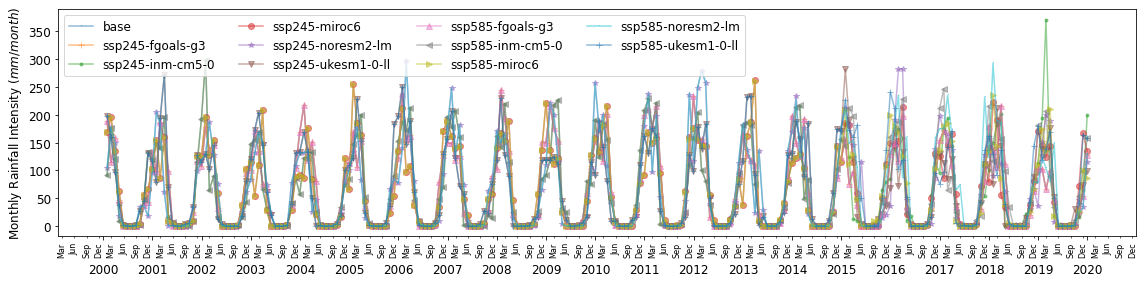

In [29]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(msdf.columns)):
    ax.plot(msdf.index, msdf.iloc[:, i], marker = next(marker), label=msdf.columns[i], alpha=0.5)
ax.tick_params(axis='both', labelsize=12)
ax.legend(ncol=4, fontsize=12, loc='upper left')
ax.set_ylabel('Monthly Rainfall Intensity $(mm/month)$', fontsize=12)


years = mdates.YearLocator()
months = mdates.MonthLocator(interval=3)
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('%Y')

# ax.xaxis.set_ticks_position('top')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label


f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_new.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

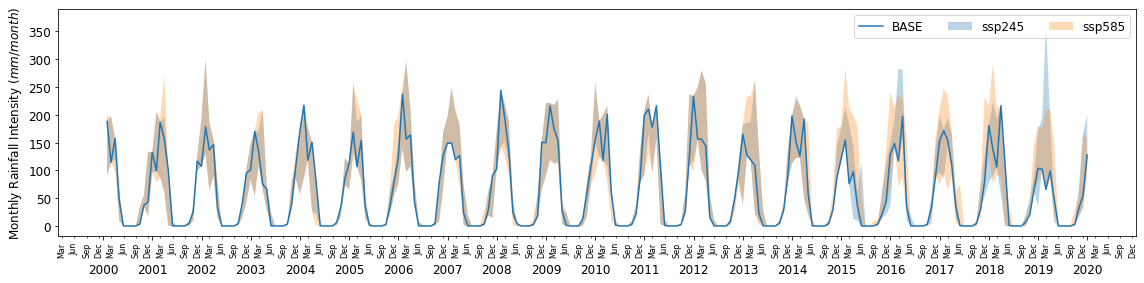

In [30]:
s245_min = msdf.iloc[:, 1:5].min(axis = 1)
s245_max = msdf.iloc[:, 1:5].max(axis = 1)
s585_min = msdf.iloc[:, 5:].min(axis = 1)
s585_max = msdf.iloc[:, 5:].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(msdf.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(msdf.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(msdf.index, msdf.iloc[:, 0], label='BASE')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Monthly Rainfall Intensity $(mm/month)$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()

ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), fontsize=8, rotation=90)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.tick_params(axis='x', pad=23) # add some space for the year label

f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_new_bd.png'), dpi=300, bbox_inches="tight")
plt.show()

# Scatter plots

In [31]:
msdf

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
2000-01-31  188.014008        188.014008         90.985603     168.684825   
2000-02-29  114.422957        114.422957        176.786381     196.643191   
2000-03-31  157.546304        157.546304        119.878210     135.698054   
2000-04-30   47.000000         47.000000          9.589883      63.127626   
2000-05-31    0.205058          0.205058          0.357588       1.673930   
...                ...               ...               ...            ...   
2019-08-31    0.014008          0.014008          0.405058       0.633074   
2019-09-30    2.915953          2.915953          5.848638       0.774708   
2019-10-31   32.754086         32.754086         16.046693      71.133074   
2019-11-30   54.245525         54.245525         64.597665     166.541634   
2019-12-31  127.771206        127.771206        198.865370     134.682101   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
2000-01-31         104.320623          198.624903        188.014008   
2000-02-29         177.471206          159.181712        114.422957   
2000-03-31         149.196498           97.809728        157.546304   
2000-04-30          18.528016           38.130350         47.000000   
2000-05-31           0.787160            2.566926          0.205058   
...                       ...                 ...               ...   
2019-08-31           0.033852            1.981323          0.014008   
2019-09-30           1.192218           29.836187          2.915953   
2019-10-31          47.638521           19.765370         32.754086   
2019-11-30          34.723346           73.780156         54.245525   
2019-12-31         115.916342           99.043191        127.771206   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
2000-01-31         90.985992     168.683268         104.319066   
2000-02-29        176.784825     196.643580         177.470428   
2000-03-31        119.878210     135.699222         149.195720   
2000-04-30          9.588716      63.129572          18.528405   
2000-05-31          0.357198       1.673541           0.787938   
...                      ...            ...                ...   
2019-08-31          0.220233       2.622179           0.120233   
2019-09-30         10.568482       0.864591           2.801556   
2019-10-31         54.631907      26.230350          24.892607   
2019-11-30         98.908560     100.835409          32.033852   
2019-12-31        157.446693      85.654475         130.008560   

            ssp585-ukesm1-0-ll  
2000-01-31          198.624514  
2000-02-29          159.182101  
2000-03-31           97.812062  
2000-04-30           38.130350  
2000-05-31            2.567315  
...                        ...  
2019-08-31            0.000000  
2019-09-30            1.410117  
2019-10-31           41.045525  
2019-11-30          164.261089  
2019-12-31          157.396498  

[240 rows x 11 columns]

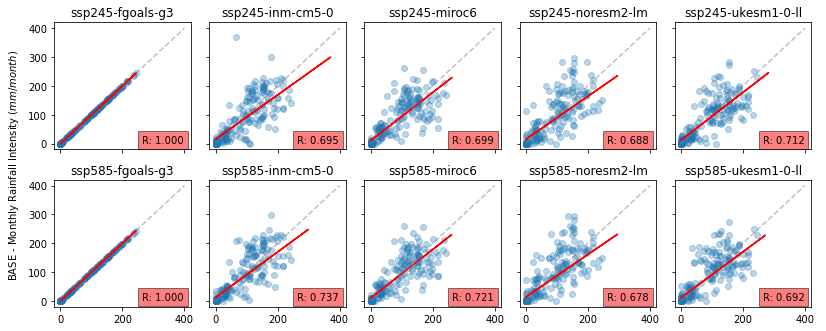

In [32]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5), sharex=True, sharey=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, c in zip(axes.flat, msdf.columns[1:]):
    ax.plot([0, 400], [0, 400], '--', color='grey', alpha=0.5)
    ax.scatter(msdf.base, msdf[c], alpha=0.3)
    # x_val = msdf.base.tolist()
    # y_val = msdf[c].tolist()
    x_val = msdf[c].tolist()
    y_val = msdf.base.tolist()
    correlation_matrix = np.corrcoef(x_val, y_val)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    m, b = np.polyfit(x_val, y_val, 1)
    ax.plot(np.array(x_val), (m*np.array(x_val)) + b, 'r')

    # ax.set_ylabel('{}'.format('BASE'))
    # ax.set_xlabel('Scenario: {}'.format(c))
    ax.set_title('{}'.format(c))

    ax.text(
            0.95, 0.05,
            'R: {:.3f}'.format(r_squared),
            horizontalalignment='right',
            bbox=dict(facecolor='red', alpha=0.5),
            transform=ax.transAxes
            )
ax1.set_ylabel('{}'.format('BASE - Monthly Rainfall Intensity $(mm/month)$'), labelpad=10)
fig.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_scatter_new.png'), dpi=300, bbox_inches="tight")
plt.show()

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

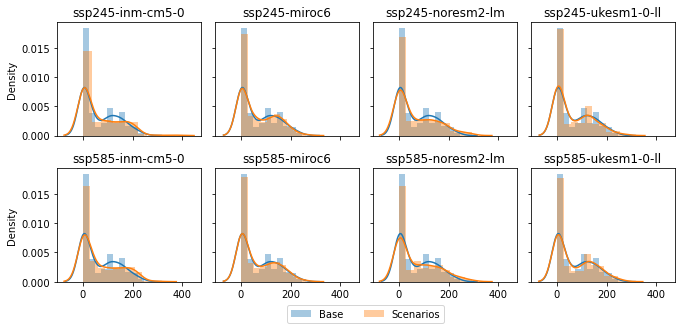

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax1 = fig.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
for ax, c in zip(axes.flat, msdf.columns[1:]):
    sns.distplot(msdf.base,  label="Base", bins=10, ax=ax, kde=True).set(xlabel=None)
    sns.distplot(msdf[c], label=c, bins=10, ax=ax, kde=True).set(xlabel=None)
    ax.set_title(c)
    # ax.legend()


lines, labels = fig.axes[0].get_legend_handles_labels()
ax1.legend(
    lines, ['Base', 'Scenarios'], loc = 'upper center', ncol=2,
    bbox_to_anchor=(0.5, -0.07),
    # fontsize=12
    )
fig.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_m_dis_new.png'), dpi=300, bbox_inches="tight")
plt.show()

# Annual Rainfall

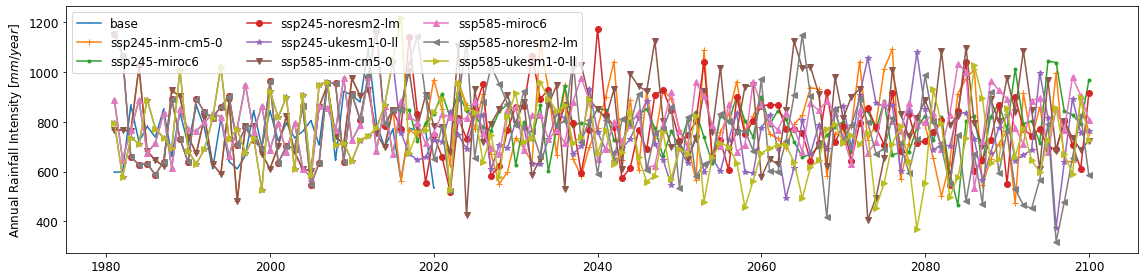

In [26]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns)):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.tick_params(axis='both', labelsize=12)
ax.legend(ncol=3, fontsize=12, loc='upper left')
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_01.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

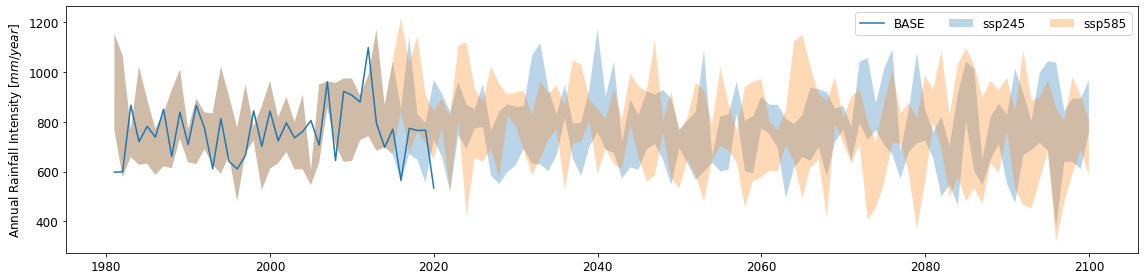

In [27]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:].min(axis = 1)
s585_max = asscn.iloc[:, 4:].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
f.tight_layout()
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_02.png'), dpi=300, bbox_inches="tight")
plt.show()


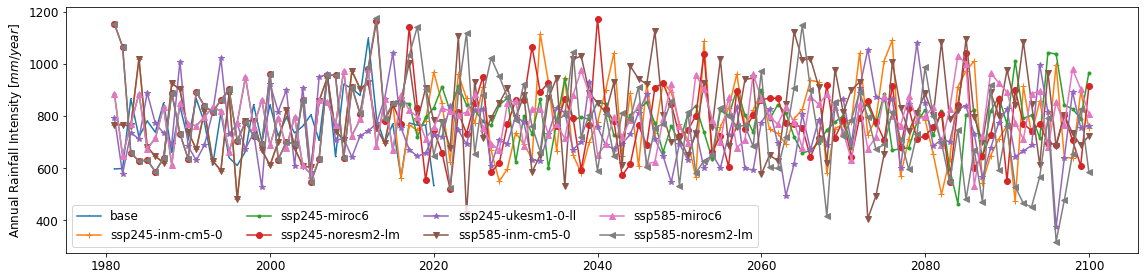

In [28]:
f, ax = plt.subplots(figsize=(16, 4))
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',))
for i in range(len(asdf.columns[:-1])):
    ax.plot(asdf.index, asdf.iloc[:, i], marker = next(marker), label=asdf.columns[i])
ax.legend(ncol=4, fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a_03.png'), dpi=300, bbox_inches="tight")
plt.show()

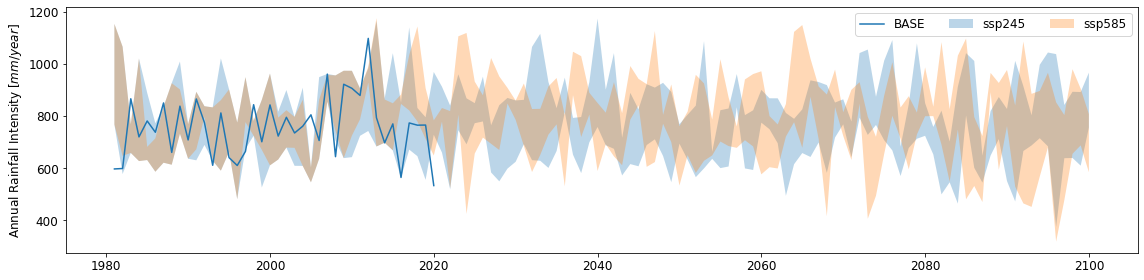

In [29]:
s245_min = asscn.iloc[:, :4].min(axis = 1)
s245_max = asscn.iloc[:, :4].max(axis = 1)
s585_min = asscn.iloc[:, 4:-1].min(axis = 1)
s585_max = asscn.iloc[:, 4:-1].max(axis = 1)

f, ax = plt.subplots(figsize=(16, 4))
ax.fill_between(asscn.index, s245_min, s245_max, alpha=0.3, label='ssp245')
ax.fill_between(asscn.index, s585_min, s585_max, alpha=0.3, label='ssp585')
ax.plot(as_base.index, as_base, label='BASE')
ax.tick_params(axis='both', labelsize=12)
lines, labels = f.axes[0].get_legend_handles_labels()
ax.set_ylabel('Annual Rainfall Intensity $[mm/year]$', fontsize=12)
ax.legend(
    lines, labels, ncol=3,
    # bbox_to_anchor=(0, 0.202),
    fontsize=12,
    # loc = 'lower left'
    )
f.tight_layout()

plt.savefig(os.path.join(working_path, 'okvg_gcms_a_04.png'), dpi=300, bbox_inches="tight")
plt.show()

# Montly Rainfall Intensity

In [69]:
tot_dff

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01  10.187938         10.187938          0.732296       3.475875   
1980-01-02  10.819455         10.819455          1.292607       0.776654   
1980-01-03   4.091829          4.091829          1.683658       3.120623   
1980-01-04   3.149027          3.149027          3.301946       3.884047   
1980-01-05   1.861089          1.861089          6.675875       5.516732   
...               ...               ...               ...            ...   
2099-12-27        NaN          2.188327          6.773541       1.202724   
2099-12-28        NaN          1.463035          4.818677       5.715564   
2099-12-29        NaN          1.293774          9.247471       9.577432   
2099-12-30        NaN          0.892607         12.368482       9.153696   
2099-12-31        NaN          1.073930          9.163424       7.384047   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          13.198054            1.514397         10.187938   
1980-01-02          10.115175            2.723346         10.819455   
1980-01-03          11.752529            2.219066          4.091829   
1980-01-04           5.987938            2.240467          3.149027   
1980-01-05           2.827626            6.182101          1.861089   
...                       ...                 ...               ...   
2099-12-27           7.402335            0.767315          0.243580   
2099-12-28           8.760311            0.767315          0.297276   
2099-12-29          11.570039            6.791440          2.791051   
2099-12-30           9.473152            3.142023         10.392607   
2099-12-31           3.149027            1.731518          3.119455   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01          0.732685       3.475875          13.197665   
1980-01-02          1.292607       0.776265          10.115175   
1980-01-03          1.683268       3.120233          11.752529   
1980-01-04          3.301946       3.884047           5.987938   
1980-01-05          6.675875       5.516732           2.828016   
...                      ...            ...                ...   
2099-12-27          7.563813       0.196109           0.979377   
2099-12-28          4.170428       0.510506           0.678988   
2099-12-29          4.113230       2.266537           0.215564   
2099-12-30          3.568093       0.231907           0.115564   
2099-12-31          1.959533       1.252918           0.940078   

            ssp585-ukesm1-0-ll  
1980-01-01            1.514397  
1980-01-02            2.723346  
1980-01-03            2.219066  
1980-01-04            2.240467  
1980-01-05            6.182101  
...                        ...  
2099-12-27            0.038911  
2099-12-28            0.038911  
2099-12-29            0.028016  
2099-12-30            2.036965  
2099-12-31            1.433074  

[43830 rows x 11 columns]

In [75]:
ctot_dff

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01  10.187938         10.187938          0.732296       3.475875   
1980-01-02  10.819455         10.819455          1.292607       0.776654   
1980-01-03   4.091829          4.091829          1.683658       3.120623   
1980-01-04   3.149027          3.149027          3.301946       3.884047   
1980-01-05   1.861089          1.861089          6.675875       5.516732   
...               ...               ...               ...            ...   
2019-12-27   7.906615          7.906615         10.793385       5.434630   
2019-12-28   7.579767          7.579767         11.310895       7.200778   
2019-12-29   5.707004          5.707004         10.040467       2.350195   
2019-12-30   5.128794          5.128794          9.759922       0.765759   
2019-12-31   5.223346          5.223346         10.371595       1.949805   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          13.198054            1.514397         10.187938   
1980-01-02          10.115175            2.723346         10.819455   
1980-01-03          11.752529            2.219066          4.091829   
1980-01-04           5.987938            2.240467          3.149027   
1980-01-05           2.827626            6.182101          1.861089   
...                       ...                 ...               ...   
2019-12-27           5.065759            0.268482          7.906615   
2019-12-28           8.080934            0.268482          7.579767   
2019-12-29          12.374319            0.082879          5.707004   
2019-12-30           4.820233            0.157977          5.128794   
2019-12-31           3.665759            0.376654          5.223346   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01          0.732685       3.475875          13.197665   
1980-01-02          1.292607       0.776265          10.115175   
1980-01-03          1.683268       3.120233          11.752529   
1980-01-04          3.301946       3.884047           5.987938   
1980-01-05          6.675875       5.516732           2.828016   
...                      ...            ...                ...   
2019-12-27          1.355253       8.648638           0.541634   
2019-12-28          1.954086       4.949805           0.926459   
2019-12-29          2.531518       2.974319           3.629183   
2019-12-30          2.308949       1.646304          13.007782   
2019-12-31          3.923735       1.439689          10.342802   

            ssp585-ukesm1-0-ll  
1980-01-01            1.514397  
1980-01-02            2.723346  
1980-01-03            2.219066  
1980-01-04            2.240467  
1980-01-05            6.182101  
...                        ...  
2019-12-27            1.469650  
2019-12-28            1.469650  
2019-12-29            1.550584  
2019-12-30            1.161479  
2019-12-31            0.880156  

[14610 rows x 11 columns]

In [67]:
fam_df = tot_dff.resample('M').sum().groupby(tot_dff.resample('M').sum().index.month).mean()
fam_df

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1   56.900327        165.363949        169.679368     164.324754   
2   45.259763        142.581767        169.345756     151.137331   
3   47.033609        116.062176        133.247422     139.771589   
4   14.989864         49.580026         31.066728      44.394329   
5    0.288735          5.061712          4.691359       3.704021   
6    0.000850          0.013862          0.265503       0.041423   
7    0.003826          0.006164          0.134147       0.021975   
8    0.036803          0.131339          0.179575       0.614241   
9    1.652601          6.140642          5.802312       2.963207   
10  12.341926         42.559089         36.112724      39.457056   
11  28.958301         90.620282         86.263609      98.830451   
12  45.426725        134.859277        138.644066     141.286148   

    ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  ssp585-inm-cm5-0  \
1          177.406359          165.925049        157.846352        174.560525   
2          157.509925          145.501291        138.663035        178.627088   
3          130.299092          119.774887        114.484848        140.088875   
4           46.998778           38.045493         46.405340         36.072085   
5            3.806975            4.676132          4.944176          4.451459   
6            0.071916            0.118191          0.035126          0.290509   
7            0.008100            0.004682          0.007626          0.168061   
8            0.251359            0.506566          0.160036          0.387014   
9            1.785759            5.131978          4.430305          6.206615   
10          30.851550           27.417682         40.549747         37.686952   
11          94.818181           99.843343         88.820350         82.267296   
12         140.264624          141.993998        128.247351        145.335379   

    ssp585-miroc6  ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1      166.155049         177.319468          168.011848  
2      151.296005         166.110743          134.132776  
3      140.535798         129.244193          112.822717  
4       45.484137          44.898444           36.922802  
5        3.206119           4.034893            6.069851  
6        0.020263           0.069536            0.181955  
7        0.009789           0.015743            0.006462  
8        0.590717           0.153914            0.685726  
9        2.333392           1.657273            5.067516  
10      38.080036          26.210425           27.775318  
11     102.720091          85.066080          101.802837  
12     143.929750         129.251368          140.781333

In [65]:
cam_df = ctot_dff.resample('M').sum().groupby(ctot_dff.resample('M').sum().index.month).mean()

In [66]:
cam_df

base  ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1   170.700982        170.700982        166.294095     159.802578   
2   135.779290        135.779290        177.383677     145.591916   
3   141.100827        141.100827        116.577549     145.556800   
4    44.969591         44.969591         29.558804      43.552082   
5     0.866206          0.866206          4.421576       4.002831   
6     0.002549          0.002549          0.117043       0.047753   
7     0.011479          0.011479          0.042928       0.022782   
8     0.110409          0.110409          0.122899       0.328813   
9     4.957802          4.957802          5.078327       2.148609   
10   37.025778         37.025778         39.810982      45.371907   
11   86.874903         86.874903         80.040438     101.433502   
12  136.280175        136.280175        140.011829     133.499543   

    ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  ssp585-inm-cm5-0  \
1          170.918006          170.811216        170.700982        165.754202   
2          162.307121          148.086537        135.779290        172.729436   
3          142.018979          127.072490        141.100827        120.246031   
4           45.052315           37.575506         44.969591         33.373696   
5            6.291206            6.601158          0.866206          4.746887   
6            0.139484            0.209358          0.002549          0.157909   
7            0.013298            0.008103          0.011479          0.093696   
8            0.099776            0.868395          0.110409          0.160126   
9            2.762636            7.607957          4.957802          5.351226   
10          39.573385           32.025837         37.025778         39.495973   
11          99.397724          104.255924         86.874903         81.722305   
12         130.779893          128.426265        136.280175        148.467549   

    ssp585-miroc6  ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1      164.634689         174.988813          171.222296  
2      144.380350         160.934251          146.937150  
3      145.912772         137.245759          128.551206  
4       43.037276          53.623482           42.585058  
5        4.060837           5.369669            7.796663  
6        0.053084           0.128317            0.217996  
7        0.023979           0.013395            0.007403  
8        0.604903           0.113045            0.782344  
9        2.293745           2.745545            6.347335  
10      42.183093          40.146897           33.610535  
11      98.592053         104.752743          110.383609  
12     133.599066         133.472626          135.505117

In [76]:
cam_df.iloc[:, 1:6]

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1         170.700982        166.294095     159.802578         170.918006   
2         135.779290        177.383677     145.591916         162.307121   
3         141.100827        116.577549     145.556800         142.018979   
4          44.969591         29.558804      43.552082          45.052315   
5           0.866206          4.421576       4.002831           6.291206   
6           0.002549          0.117043       0.047753           0.139484   
7           0.011479          0.042928       0.022782           0.013298   
8           0.110409          0.122899       0.328813           0.099776   
9           4.957802          5.078327       2.148609           2.762636   
10         37.025778         39.810982      45.371907          39.573385   
11         86.874903         80.040438     101.433502          99.397724   
12        136.280175        140.011829     133.499543         130.779893   

    ssp245-ukesm1-0-ll  
1           170.811216  
2           148.086537  
3           127.072490  
4            37.575506  
5             6.601158  
6             0.209358  
7             0.008103  
8             0.868395  
9             7.607957  
10           32.025837  
11          104.255924  
12          128.426265

In [72]:
s245_min = cam_df.iloc[:, 1:6].min(axis = 1)
s245_max = cam_df.iloc[:, 1:6].max(axis = 1)
s585_min = cam_df.iloc[:, 6:].min(axis = 1)
s585_max = cam_df.iloc[:, 6:].max(axis = 1)

fs245_min = fam_df.iloc[:, 1:6].min(axis = 1)
fs245_max = fam_df.iloc[:, 1:6].max(axis = 1)
fs585_min = fam_df.iloc[:, 6:].min(axis = 1)
fs585_max = fam_df.iloc[:, 6:].max(axis = 1)

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


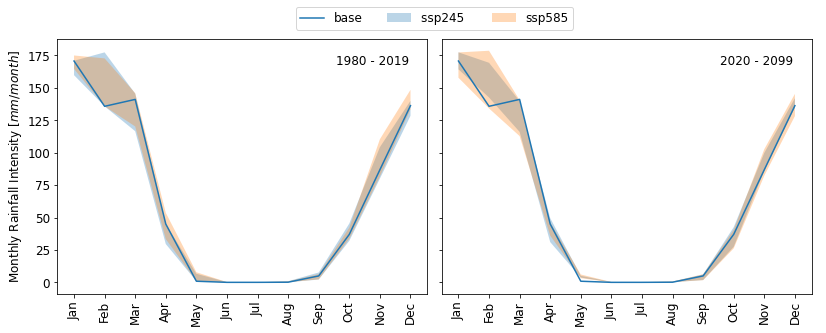

In [109]:
#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

month_names = [
            'Jan','Feb','Mar','Apr','May','Jun',
            'Jul','Aug','Sep','Oct','Nov','Dec'
            ]
axes[0].plot(cam_df.index, cam_df.iloc[:, 0], label='base')
axes[0].fill_between(cam_df.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[0].fill_between(cam_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

axes[1].plot(cam_df.index, cam_df.iloc[:, 0], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(fam_df.index, fs245_min, fs245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(fam_df.index, fs585_min, fs585_max, alpha=0.3, label='ssp585')
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90,)
    ax.set_xticks(fam_df.index[::1])
    ax.tick_params(axis='both', labelsize=12)
# axes[0].legend(cam_df.columns.tolist(), fontsize=12)
# axes[0].legend(
#             fontsize=12,
#             bbox_to_anchor=(-0.5, 1.2), ncol=3)

ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12, labelpad=10)
lines, labels = f.axes[0].get_legend_handles_labels()
# h2, l2 = axes[0].get_legend_handles_labels()

ax1.legend(
    lines, labels, loc = 'upper center', ncol=3,
    bbox_to_anchor=(0.5, 1.15),
    fontsize=12
    )
axes[0].text(
    0.95, 0.90,
    '{}'.format('1980 - 2019'),
    ha='right',
    fontsize=12,
    transform=axes[0].transAxes)

axes[1].text(
    0.95, 0.90,
    '{}'.format('2020 - 2099'),
    ha='right',
    fontsize=12,
    transform=axes[1].transAxes)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_f.png'), dpi=300, bbox_inches="tight")
plt.show()


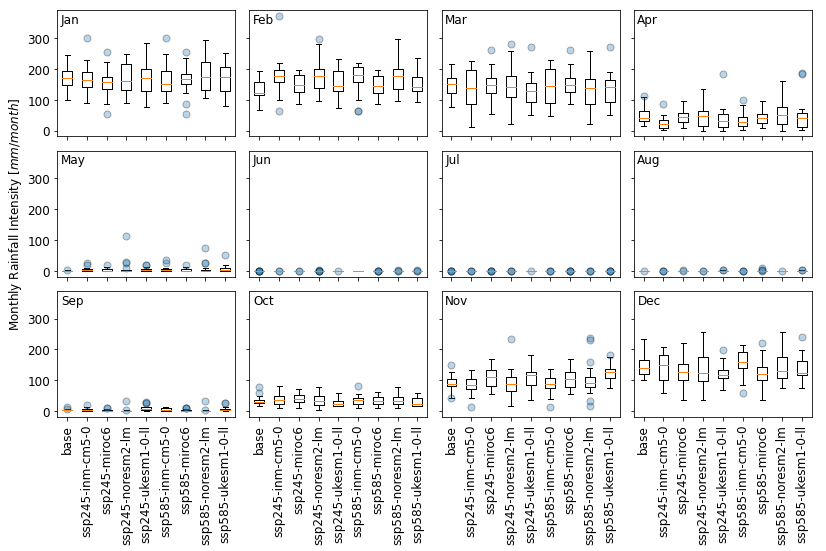

In [32]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = msdf.loc[msdf.index.month==i+1]
    df_m = df_m.dropna()
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
    )
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$', fontsize=12, labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon03.png'), dpi=300, bbox_inches="tight")
plt.show()


In [33]:
msdf

base  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
2000-01-31  188.014008         90.985603     168.684825         104.320623   
2000-02-29  114.422957        176.786381     196.643191         177.471206   
2000-03-31  157.546304        119.878210     135.698054         149.196498   
2000-04-30   47.000000          9.589883      63.127626          18.528016   
2000-05-31    0.205058          0.357588       1.673930           0.787160   
...                ...               ...            ...                ...   
2019-08-31    0.014008          0.405058       0.633074           0.033852   
2019-09-30    2.915953          5.848638       0.774708           1.192218   
2019-10-31   32.754086         16.046693      71.133074          47.638521   
2019-11-30   54.245525         64.597665     166.541634          34.723346   
2019-12-31  127.771206        198.865370     134.682101         115.916342   

            ssp245-ukesm1-0-ll  ssp585-inm-cm5-0  ssp585-miroc6  \
2000-01-31          198.624903         90.985992     168.683268   
2000-02-29          159.181712        176.784825     196.643580   
2000-03-31           97.809728        119.878210     135.699222   
2000-04-30           38.130350          9.588716      63.129572   
2000-05-31            2.566926          0.357198       1.673541   
...                        ...               ...            ...   
2019-08-31            1.981323          0.220233       2.622179   
2019-09-30           29.836187         10.568482       0.864591   
2019-10-31           19.765370         54.631907      26.230350   
2019-11-30           73.780156         98.908560     100.835409   
2019-12-31           99.043191        157.446693      85.654475   

            ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
2000-01-31         104.319066          198.624514  
2000-02-29         177.470428          159.182101  
2000-03-31         149.195720           97.812062  
2000-04-30          18.528405           38.130350  
2000-05-31           0.787938            2.567315  
...                       ...                 ...  
2019-08-31           0.120233            0.000000  
2019-09-30           2.801556            1.410117  
2019-10-31          24.892607           41.045525  
2019-11-30          32.033852          164.261089  
2019-12-31         130.008560          157.396498  

[240 rows x 9 columns]

# Temperature

In [6]:
full_paths
wt_fds

['ssp245-fgoals-g3',
 'ssp245-inm-cm5-0',
 'ssp245-miroc6',
 'ssp245-noresm2-lm',
 'ssp245-ukesm1-0-ll',
 'ssp585-fgoals-g3',
 'ssp585-inm-cm5-0',
 'ssp585-miroc6',
 'ssp585-noresm2-lm',
 'ssp585-ukesm1-0-ll']

In [26]:
dff_max = pd.DataFrame()
dff_min = pd.DataFrame()
for i, name in zip(full_paths, wt_fds):
    # if name != 'ssp245-fgoals-g3' and name != 'ssp585-fgoals-g3':

    df_max, df_min = gcm_analysis.read_tmp(os.path.join(i, 'Tmp1.Tmp'), 154)
    df_max.replace(-99, np.nan, inplace=True)
    df_min.replace(-99, np.nan, inplace=True)
    df_max = df_max.mean(axis=1)
    df_min = df_min.mean(axis=1)    
    df_max.name = '{}'.format(name)
    df_min.name = '{}'.format(name)    
    dff_max = pd.concat([dff_max, df_max], axis=1)
    dff_min = pd.concat([dff_min, df_min], axis=1)


100%|██████████| 154/154 [00:08<00:00, 18.14it/s]


In [27]:
dff_max.index = pd.DatetimeIndex(dff_max.index).normalize()
dff_min.index = pd.DatetimeIndex(dff_min.index).normalize()

In [29]:
dff_min

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01               NaN         18.500000      16.812987   
1980-01-02               NaN         19.010390      16.994805   
1980-01-03               NaN         18.859740      17.672727   
1980-01-04               NaN         18.844805      19.170130   
1980-01-05               NaN         19.318182      18.581818   
...                      ...               ...            ...   
2099-12-27         18.877922         21.231818      21.520130   
2099-12-28         20.229221         20.272727      20.914935   
2099-12-29         20.396104         20.441558      20.294156   
2099-12-30         19.983766         20.220779      19.957143   
2099-12-31         21.205195         19.748701      20.422078   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          16.215584           16.635714               NaN   
1980-01-02          16.433766           16.799351               NaN   
1980-01-03          16.250000           16.298701               NaN   
1980-01-04          16.012987           16.673377               NaN   
1980-01-05          16.120779           17.467532               NaN   
...                       ...                 ...               ...   
2099-12-27          19.353896           21.511039         23.218831   
2099-12-28          20.125974           21.511039         23.014935   
2099-12-29          20.159091           21.645455         23.342857   
2099-12-30          20.583766           20.997403         19.712987   
2099-12-31          21.165584           21.537662         23.333766   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01         18.500000      16.812987          16.215584   
1980-01-02         19.010390      16.994805          16.433766   
1980-01-03         18.859740      17.672727          16.250000   
1980-01-04         18.844805      19.170130          16.012987   
1980-01-05         19.318182      18.581818          16.120779   
...                      ...            ...                ...   
2099-12-27         18.285065      20.351299          24.737013   
2099-12-28         16.955195      21.442208          24.688961   
2099-12-29         17.925974      21.442208          23.431818   
2099-12-30         18.795455      19.717532          23.616883   
2099-12-31         19.277273      20.364935          24.105844   

            ssp585-ukesm1-0-ll  
1980-01-01           16.635714  
1980-01-02           16.799351  
1980-01-03           16.298701  
1980-01-04           16.673377  
1980-01-05           17.467532  
...                        ...  
2099-12-27           26.859091  
2099-12-28           26.859091  
2099-12-29           26.137013  
2099-12-30           27.479870  
2099-12-31           28.687013  

[43830 rows x 10 columns]

In [30]:
dff_mean = pd.concat([dff_max, dff_min]).groupby(level=0).mean()

In [31]:
mtmp_max = dff_max.groupby(dff_max.index.month).mean()
mtmp_min = dff_min.groupby(dff_min.index.month).mean()
mtmp_avg = dff_mean.groupby(dff_mean.index.month).mean()



In [32]:
mtmp_max

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  ssp245-noresm2-lm  \
1          31.524909         30.386313      30.702290          30.934727   
2          31.186453         30.196953      30.706507          30.641269   
3          31.548837         30.504288      30.227405          30.898590   
4          31.199487         30.441861      30.546205          31.276772   
5          30.396473         28.927230      29.534454          29.639054   
6          28.573031         26.916315      27.643973          28.162133   
7          28.128633         27.600560      28.296067          28.041658   
8          32.573222         31.453729      31.861139          31.733161   
9          37.013816         36.404342      36.415013          35.639558   
10         36.604499         36.801913      36.992574          37.560595   
11         34.669945         34.154847      34.394870          35.032391   
12         32.790211         32.097041      32.303941          32.727677   

    ssp245-ukesm1-0-ll  ssp585-fgoals-g3  ssp585-inm-cm5-0  ssp585-miroc6  \
1            31.992203         32.521366         30.764320      31.587785   
2            32.001481         32.035412         30.509958      31.519755   
3            31.863423         32.210969         30.888438      30.980034   
4            31.708937         32.252631         30.834288      31.243723   
5            30.720002         31.046874         29.142476      30.290360   
6            29.098714         29.106710         27.205810      28.430056   
7            29.192932         28.724352         28.156819      28.934901   
8            32.532591         33.014422         32.151427      32.579804   
9            37.081762         38.321346         37.061809      37.352527   
10           39.016291         37.920349         37.218258      37.746684   
11           35.525497         35.419971         34.943530      34.933450   
12           33.076946         33.823951         32.478490      33.049296   

    ssp585-noresm2-lm  ssp585-ukesm1-0-ll  
1           31.566252           32.903875  
2           31.209166           33.237212  
3           31.731288           33.216543  
4           32.049479           33.279888  
5           30.536416           31.883716  
6           29.093276           30.300072  
7           29.023828           30.281141  
8           32.268194           33.503556  
9           36.129754           37.921952  
10          38.304986           39.876170  
11          36.057821           36.352389  
12          33.637673           34.302365

In [33]:
mt245_min = mtmp_min.iloc[:, :4].min(axis = 1)
mt245_max = mtmp_max.iloc[:, :4].max(axis = 1)
mt585_min = mtmp_min.iloc[:, 4:].min(axis = 1)
mt585_max = mtmp_max.iloc[:, 4:].max(axis = 1)

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


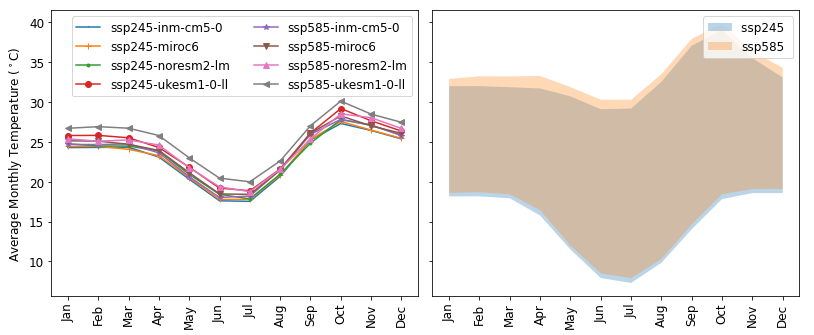

In [40]:
f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for i in range(len(mtmp_max.columns)):
    axes[0].plot(mtmp_avg.index, mtmp_avg.iloc[:, i], marker = next(marker))
axes[1].fill_between(mtmp_max.index, mt245_min, mt245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mtmp_max.index, mt585_min, mt585_max, alpha=0.3, label='ssp585')

for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mtmp_max.index[::1])
    ax.tick_params(axis='both', labelsize=12)
axes[0].legend(mtmp_max.columns.tolist(), ncol=2, fontsize=12)
axes[1].legend(fontsize=12)

ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp_01.png'), dpi=300, bbox_inches="tight")
plt.show()

In [35]:
adf_min = dff_min.resample('A').mean()
adf_max = dff_max.resample('A').mean()
adf_mean = dff_mean.resample('A').mean()
adf_mean

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-12-31               NaN         22.143041      21.233841   
1981-12-31               NaN         22.141866      21.143695   
1982-12-31               NaN         21.372136      22.202134   
1983-12-31               NaN         21.150001      21.982395   
1984-12-31               NaN         21.706391      22.891081   
...                      ...               ...            ...   
2095-12-31         24.795813         23.523718      23.233735   
2096-12-31         24.865513         24.482109      23.981042   
2097-12-31         23.889247         24.726740      24.027039   
2098-12-31         24.390725         23.349130      24.395772   
2099-12-31         24.764207         24.173761      24.224022   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-12-31          21.382778           20.925008               NaN   
1981-12-31          21.550398           22.207304               NaN   
1982-12-31          22.042218           22.361357               NaN   
1983-12-31          22.742381           22.538414               NaN   
1984-12-31          21.487228           21.240087               NaN   
...                       ...                 ...               ...   
2095-12-31          25.830170           28.991511         26.178673   
2096-12-31          24.688695           28.434426         27.481359   
2097-12-31          24.193764           26.921737         26.059800   
2098-12-31          25.649712           26.517227         26.566896   
2099-12-31          24.322174           27.077150         27.223741   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-12-31         22.143041      21.233841          21.382778   
1981-12-31         22.141866      21.143695          21.550398   
1982-12-31         21.372136      22.202134          22.042218   
1983-12-31         21.150001      21.982395          22.742381   
1984-12-31         21.706391      22.891081          21.487228   
...                      ...            ...                ...   
2095-12-31         26.024765      27.006470          29.468814   
2096-12-31         25.680187      26.460003          28.342710   
2097-12-31         25.354880      26.192210          27.912209   
2098-12-31         27.214132      27.462830          27.859856   
2099-12-31         26.442045      26.998449          27.153563   

            ssp585-ukesm1-0-ll  
1980-12-31           20.925008  
1981-12-31           22.207304  
1982-12-31           22.361357  
1983-12-31           22.538414  
1984-12-31           21.240087  
...                        ...  
2095-12-31           30.680833  
2096-12-31           31.538681  
2097-12-31           32.221335  
2098-12-31           32.319269  
2099-12-31           30.812379  

[120 rows x 10 columns]

In [37]:
t245_min = adf_min.iloc[:, :5].min(axis = 1)
t245_max = adf_max.iloc[:, :5].max(axis = 1)
t585_min = adf_min.iloc[:, 5:].min(axis = 1)
t585_max = adf_max.iloc[:, 5:].max(axis = 1)

In [38]:
t245_max

1980-12-31    30.445508
1981-12-31    30.631112
1982-12-31    31.089219
1983-12-31    31.386255
1984-12-31    31.722573
                ...    
2095-12-31    38.302080
2096-12-31    37.394663
2097-12-31    35.302211
2098-12-31    34.692277
2099-12-31    35.779870
Freq: A-DEC, Length: 120, dtype: float64

In [39]:
mtmp = dff_mean.loc[dff_mean.index.month==0+1]
mtmp

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-01-01               NaN         26.542857      22.887013   
1980-01-02               NaN         26.613961      25.047403   
1980-01-03               NaN         26.303896      25.076299   
1980-01-04               NaN         25.650974      25.912662   
1980-01-05               NaN         24.828571      25.140909   
...                      ...               ...            ...   
2099-01-27         29.198052         25.133766      28.566883   
2099-01-28         24.979870         24.502273      29.539610   
2099-01-29         27.317857         23.804545      28.251623   
2099-01-30         26.279545         22.798701      25.147078   
2099-01-31         26.291234         23.353247      21.757143   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-01-01          19.920455           23.603896               NaN   
1980-01-02          20.334091           23.534416               NaN   
1980-01-03          20.507468           23.600974               NaN   
1980-01-04          19.909091           24.197727               NaN   
1980-01-05          20.771104           24.434740               NaN   
...                       ...                 ...               ...   
2099-01-27          25.543182           28.714610         31.526299   
2099-01-28          24.986688           27.753571         31.842857   
2099-01-29          25.907143           27.102922         30.814286   
2099-01-30          25.704870           25.565584         31.857468   
2099-01-31          25.920455           26.722078         31.306494   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-01-01         26.542857      22.887013          19.920455   
1980-01-02         26.613961      25.047403          20.334091   
1980-01-03         26.303896      25.076299          20.507468   
1980-01-04         25.650974      25.912662          19.909091   
1980-01-05         24.828571      25.140909          20.771104   
...                      ...            ...                ...   
2099-01-27         29.471429      27.199675          23.130195   
2099-01-28         29.959740      26.781818          24.354870   
2099-01-29         27.370779      28.162662          24.266883   
2099-01-30         26.381169      28.530844          24.645455   
2099-01-31         24.555195      29.892857          25.921429   

            ssp585-ukesm1-0-ll  
1980-01-01           23.603896  
1980-01-02           23.534416  
1980-01-03           23.600974  
1980-01-04           24.197727  
1980-01-05           24.434740  
...                        ...  
2099-01-27           31.925325  
2099-01-28           30.839935  
2099-01-29           31.097727  
2099-01-30           30.983442  
2099-01-31           30.672078  

[3720 rows x 10 columns]

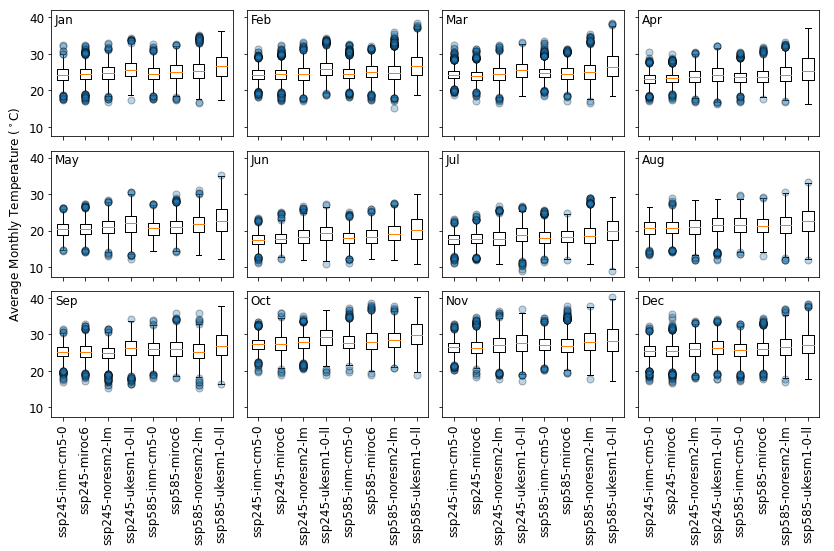

In [45]:
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True, sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    mtmp = dff_mean.loc[dff_mean.index.month==i+1]
    ax.boxplot(
        mtmp.values, flierprops=flierprops,
        #showfliers=False
        )
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels(mtmp.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
    
    ax.tick_params(axis='both', labelsize=12)
ax1.set_ylabel('Average Monthly Temperature ($^\circ$C)', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon_temp.png'), dpi=300, bbox_inches="tight")
plt.show()

In [43]:
adf_mean

ssp245-fgoals-g3  ssp245-inm-cm5-0  ssp245-miroc6  \
1980-12-31               NaN         22.143041      21.233841   
1981-12-31               NaN         22.141866      21.143695   
1982-12-31               NaN         21.372136      22.202134   
1983-12-31               NaN         21.150001      21.982395   
1984-12-31               NaN         21.706391      22.891081   
...                      ...               ...            ...   
2095-12-31         24.795813         23.523718      23.233735   
2096-12-31         24.865513         24.482109      23.981042   
2097-12-31         23.889247         24.726740      24.027039   
2098-12-31         24.390725         23.349130      24.395772   
2099-12-31         24.764207         24.173761      24.224022   

            ssp245-noresm2-lm  ssp245-ukesm1-0-ll  ssp585-fgoals-g3  \
1980-12-31          21.382778           20.925008               NaN   
1981-12-31          21.550398           22.207304               NaN   
1982-12-31          22.042218           22.361357               NaN   
1983-12-31          22.742381           22.538414               NaN   
1984-12-31          21.487228           21.240087               NaN   
...                       ...                 ...               ...   
2095-12-31          25.830170           28.991511         26.178673   
2096-12-31          24.688695           28.434426         27.481359   
2097-12-31          24.193764           26.921737         26.059800   
2098-12-31          25.649712           26.517227         26.566896   
2099-12-31          24.322174           27.077150         27.223741   

            ssp585-inm-cm5-0  ssp585-miroc6  ssp585-noresm2-lm  \
1980-12-31         22.143041      21.233841          21.382778   
1981-12-31         22.141866      21.143695          21.550398   
1982-12-31         21.372136      22.202134          22.042218   
1983-12-31         21.150001      21.982395          22.742381   
1984-12-31         21.706391      22.891081          21.487228   
...                      ...            ...                ...   
2095-12-31         26.024765      27.006470          29.468814   
2096-12-31         25.680187      26.460003          28.342710   
2097-12-31         25.354880      26.192210          27.912209   
2098-12-31         27.214132      27.462830          27.859856   
2099-12-31         26.442045      26.998449          27.153563   

            ssp585-ukesm1-0-ll  
1980-12-31           20.925008  
1981-12-31           22.207304  
1982-12-31           22.361357  
1983-12-31           22.538414  
1984-12-31           21.240087  
...                        ...  
2095-12-31           30.680833  
2096-12-31           31.538681  
2097-12-31           32.221335  
2098-12-31           32.319269  
2099-12-31           30.812379  

[120 rows x 10 columns]

In [129]:
t245_max['1980-1-1':'2019-12-31'].mean()

31.61917674511468

C:\Users\seonggyu.park\Miniconda3\envs\sm_pest\lib\site-packages\ipykernel_launcher.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


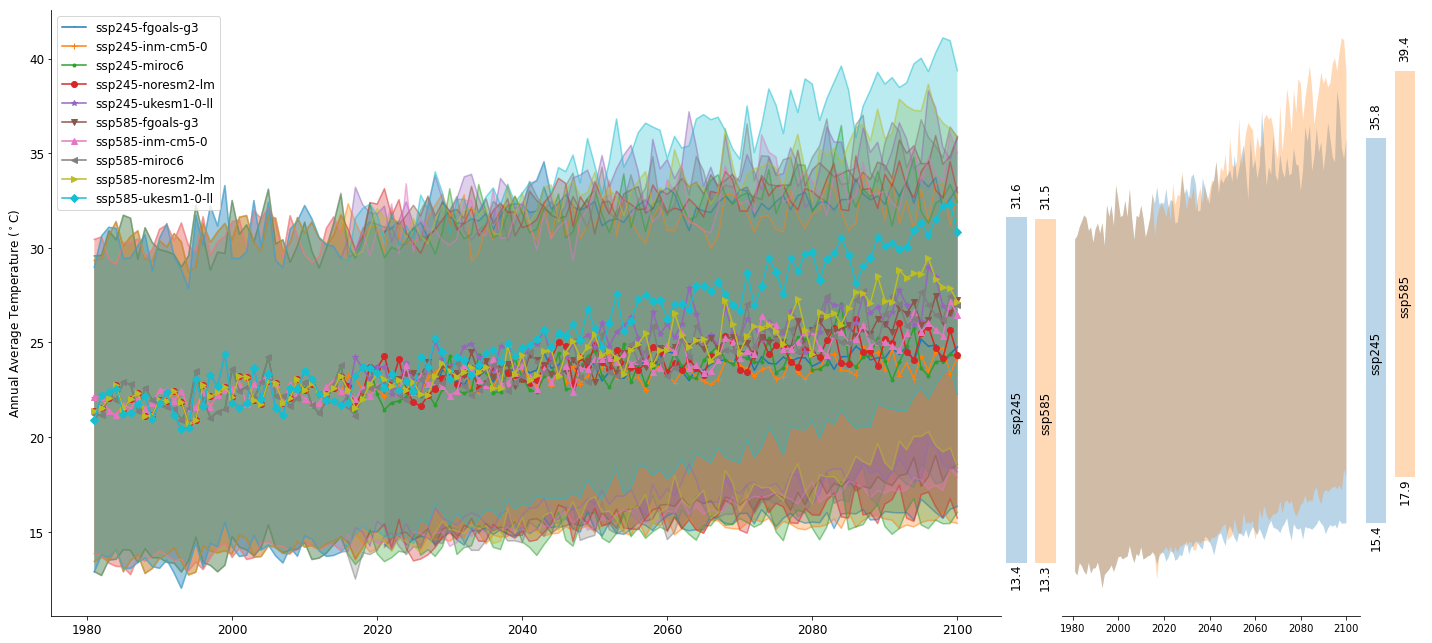

In [44]:
f, axes = plt.subplots(
    1, 4, figsize=(20, 9), sharey=True,
    gridspec_kw={
                'width_ratios': [0.7, 0.04, 0.22, 0.04],
                'wspace': 0.01
                })

ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].axis('off')

# axes[1].axis('off')
axes[3].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[3].axis('off')

ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>', 'D'))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(len(adf_mean.columns)):
    axes[0].plot(adf_mean.index, adf_mean.iloc[:, i], marker = next(marker), label=adf_mean.columns[i])
    axes[0].plot(adf_mean.index, adf_min.iloc[:, i], color=colors[i], alpha=0.5)
    axes[0].fill_between(adf_mean.index, adf_min.iloc[:, i], adf_max.iloc[:, i], alpha=0.3)
    axes[0].plot(adf_mean.index, adf_max.iloc[:, i], color=colors[i], alpha=0.5)
    # ax.fill_between(scn_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

axes[2].fill_between(adf_mean.index, t245_min, t245_max, alpha=0.3, label='ssp245 ')
axes[2].fill_between(adf_mean.index, t585_min, t585_max, alpha=0.3, label='ssp585')

ntmax245 = t245_max['1980-1-1':'2019-12-31'].mean()
ntmin245 = t245_min['1980-1-1':'2019-12-31'].mean()

ntmax585 = t585_max['1980-1-1':'2019-12-31'].mean()
ntmin585 = t585_min['1980-1-1':'2019-12-31'].mean()


axes[1].bar(
    0, ntmax245-ntmin245,
    width=0.7,
    bottom=ntmin245, alpha=0.3)
axes[1].bar(
    1, ntmax585-ntmin585,
    width=0.7,
    bottom=ntmin585, alpha=0.3)

axes[1].text(
    0, (ntmax245+ntmin245)/2,
   'ssp245',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[1].text(
    1, (ntmax585+ntmin585)/2,
    'ssp585',
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, ntmin245,
    '{:.1f}'.format(ntmin245),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[1].text(
    1, ntmin585,
    '{:.1f}'.format(ntmin585),    
    rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[1].text(
    0, ntmax245+0.5,
    '{:.1f}'.format(ntmax245),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[1].text(
    1, ntmax585+0.5,
    '{:.1f}'.format(ntmax585),    
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12
    )

axes[3].bar(
    0, t245_max['2099-12-31']-t245_min['2099-12-31'],
    width=0.7,
    bottom=t245_min['2099-12-31'], alpha=0.3)
axes[3].bar(
    1, t585_max['2099-12-31']-t585_min['2099-12-31'],
    width=0.7,
    bottom=t585_min['2099-12-31'], alpha=0.3)

# ax1.add_patch(Rectangle((1.01, 0.2), 0.01, 0.95))

axes[0].tick_params(axis='both', labelsize=12)
axes[0].legend(loc='upper left', fontsize=12,)
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[2].spines['left'].set_visible(False)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].tick_params(top=False, left=False, right=False)

# axes[1].tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

axes[3].text(
    0, (t245_min['2099-12-31']+t245_max['2099-12-31'])/2,
    'ssp245', rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    1, (t585_min['2099-12-31']+t585_max['2099-12-31'])/2,
    'ssp585', rotation=90,
    va='top',
    ha='center',
    fontsize=12
    )

axes[3].text(
    0, t245_min['2099-12-31'],
    '{:.1f}'.format(t245_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)
axes[3].text(
    0, t245_max['2099-12-31']+0.5,
    '{:.1f}'.format(t245_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_min['2099-12-31'],
    '{:.1f}'.format(t585_min['2099-12-31']),
    rotation=90,
    va='top',
    ha='center',
    fontsize=12)

axes[3].text(
    1, t585_max['2099-12-31']+0.5,
    '{:.1f}'.format(t585_max['2099-12-31']),
    rotation=90,
    va='bottom',
    ha='center',
    fontsize=12)


ax1.set_ylabel('Annual Average Temperature ($^\circ$C)', fontsize=12)
# axes[1].legend()
# ax.set_yscale('log')
f.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_scn_tmp.png'), dpi=300, bbox_inches="tight")
plt.show()
# ax.plot(base_df.index, base_df, label='BASE')

In [47]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [48]:


tot_df

#%%
abase_df = base_dff.resample('A').sum()
adf =dff.resample('A').sum()
atot_df = pd.concat([abase_df, adf], axis=1)
atot_df

#%% get month plot 
mon_df = tot_df.groupby(tot_df.index.month).mean()
mon_df

#%% get min max
gcsms_mon = mon_df.iloc[:, 1:]
s245_min = gcsms_mon.iloc[:, :4].min(axis = 1)
s245_max = gcsms_mon.iloc[:, :4].max(axis = 1)
s585_min = gcsms_mon.iloc[:, 4:].min(axis = 1)
s585_max = gcsms_mon.iloc[:, 4:].max(axis = 1)



#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(mon_df.index, mon_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(mon_df.index, s245_min, s245_max, alpha=0.3, label='ssp245 ')
axes[1].fill_between(mon_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(mon_df.columns)):
    axes[0].plot(mon_df.index, mon_df.iloc[:, i], marker = next(marker))
axes[0].legend(mon_df.columns.tolist())
axes[1].legend()
# month_names = ['Jan','Feb','Mar','Apr','May','Jun',
#                'Jul','Aug','Sep','Oct','Nov','Dec']
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
for ax in axes:
    ax.set_xticklabels(month_names, rotation=90)
    ax.set_xticks(mon_df.index[::1])
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon.png'), dpi=300, bbox_inches="tight")
plt.show()

#%%
# Boxplot
f, axes = plt.subplots(3, 4, figsize=(12,8), sharex=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']


# plot. Set color of marker edge
flierprops = dict(
                marker='o', markerfacecolor='#1f77b4', markersize=7,
                # linestyle='None',
                # markeredgecolor='none',
                alpha=0.3)
for i, ax in enumerate(axes.flat):
    df_m = tot_df.loc[tot_df.index.month==i+1]
    ax.boxplot(df_m.values, flierprops=flierprops)
    ax.set_xticks([i+1 for i in range(9)])
    ax.set_xticklabels(df_m.keys(), rotation=90)
    # ax.set_xticks(df_m.columns[::1])
    ax.set_title(
        month_names[i],
        horizontalalignment='left',
        x=0.02,
        y=0.85,
        )
ax1.set_ylabel('Monthly Rainfall Intensity $[mm/month]$')
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_mon2.png'), dpi=300, bbox_inches="tight")
plt.show()

#%% get min max
agcm = atot_df.iloc[:, 1:]
s245_min = agcm.iloc[:, :4].min(axis = 1)
s245_max = agcm.iloc[:, :4].max(axis = 1)
s585_min = agcm.iloc[:, 4:].min(axis = 1)
s585_max = agcm.iloc[:, 4:].max(axis = 1)


ctot_df = atot_df['1/1/2000':'12/31/2019']

#%% plot month
# 
marker = itertools.cycle((',', '+', '.', 'o', '*', 'v', '^', '<', '>',)) 

f, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
ax1 = f.add_subplot(111, frameon=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axes[1].plot(atot_df.index, atot_df['base'], label='base')
# ax.fill_between(base_dff.index, 0, base_dff.sub_137, alpha=0.3)
axes[1].fill_between(atot_df.index, s245_min, s245_max, alpha=0.3, label='ssp245')
axes[1].fill_between(atot_df.index, s585_min, s585_max, alpha=0.3, label='ssp585')

# axes[0].plot(mon_df.index, mon_df, marker=[',', '+', '.', 'o', '*'])
for i in range(len(ctot_df.columns)):
    axes[0].plot(ctot_df.index, ctot_df.iloc[:, i], marker = next(marker))
axes[0].legend(atot_df.columns.tolist(), ncol=2)
axes[1].legend()

month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
axes[0].margins( y=0.2)
ax1.set_ylabel('Annual Rainfall Intensity $[mm/year]$', labelpad=10)
plt.tight_layout()
plt.savefig(os.path.join(working_path, 'okvg_gcms_a.png'), dpi=300, bbox_inches="tight")
plt.show()


NameError: name 'base_dff' is not defined

In [71]:
from swatmf_pkgs import swatmf_viz
import itertools